<a href="https://colab.research.google.com/github/enzocarvs/TelecomX-Parte-02/blob/main/TelecomX_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/enzocarvs/TelecomX-Parte-02.git
%cd TelecomX-Parte-02

Cloning into 'TelecomX-Parte-02'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
Receiving objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
/content/TelecomX-Parte-02/TelecomX-Parte-02/TelecomX-Parte-02


In [ ]:
import pandas as pd

In [ ]:
# Caminho correto no Colab
df = pd.read_csv("/content/dados_tratados.csv")

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df = df.drop(columns=['customerID'])
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Aplica One-Hot Encoding (sem incluir coluna de todos zeros)
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificando o resultado
print(df_encoded.head())
print("Formato final:", df_encoded.shape)

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   Churn_Yes  customer.gender_Male  customer.Partner_Yes  \
0      False                 False                  True   
1      False                  True                 False   
2       True                  True                 False   
3       True                  True                  True   
4       True                 False                  True   

   customer.Dependents_Yes  phone.PhoneService_Yes  \
0                     True                    True   
1                    False                    True   
2                    False                    True

In [ ]:
# Garantir que colunas numéricas fiquem no tipo correto antes do encoding
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Aplicar One-Hot Encoding só nas categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())
print("Formato final:", df_encoded.shape)

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Churn_Yes  customer.gender_Male  \
0                 593.30      False                 False   
1                 542.40      False                  True   
2                 280.85       True                  True   
3                1237.85       True                  True   
4                 267.40       True                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                  True                     True                    True   
1                 False                    False      

In [32]:
# 1) conferir tipos e amostra
df_encoded.info()
df_encoded.head()

# 2) garantir que a coluna alvo existe e é int
assert 'Churn_Yes' in df_encoded.columns
df_encoded['Churn_Yes'] = df_encoded['Churn_Yes'].astype(int)

# 3) transformar dummies booleanas em 0/1 (alguns modelos e exports preferem int)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# 4) checar nulos
df_encoded.isnull().sum().sort_values(ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7267 non-null   int64  
 1   customer.tenure                                7267 non-null   int64  
 2   account.Charges.Monthly                        7267 non-null   float64
 3   account.Charges.Total                          7256 non-null   float64
 4   Churn_Yes                                      7267 non-null   bool   
 5   customer.gender_Male                           7267 non-null   bool   
 6   customer.Partner_Yes                           7267 non-null   bool   
 7   customer.Dependents_Yes                        7267 non-null   bool   
 8   phone.PhoneService_Yes                         7267 non-null   bool   
 9   phone.MultipleLines_No phone service           7267 

,0
account.Charges.Total,11
customer.tenure,0
customer.SeniorCitizen,0
account.Charges.Monthly,0
Churn_Yes,0


In [33]:
# verificar valores nulos
df_encoded.isnull().sum()

# estratégia 1: preencher com a mediana (evita distorção por outliers)
df_encoded['account.Charges.Total'] = df_encoded['account.Charges.Total'].fillna(df_encoded['account.Charges.Total'].median())

# estratégia 2: remover linhas (só se forem poucas e não essenciais)
# df_encoded = df_encoded.dropna(subset=['account.Charges.Total'])

# conferir novamente
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_No phone service,0


# proporção de evasão:

In [34]:
# Contagem absoluta
contagem = df_encoded['Churn_Yes'].value_counts()

# Proporção relativa
proporcao = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100

print("Contagem:")
print(contagem)
print("\nProporção (%):")
print(proporcao)

Contagem:
Churn_Yes
0    5398
1    1869
Name: count, dtype: int64

Proporção (%):
Churn_Yes
0    74.280996
1    25.719004
Name: proportion, dtype: float64


# BALANCEAMENTO DAS CLASSES

In [36]:
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Criar o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar o oversampling
X_res, y_res = smote.fit_resample(X, y)

# Conferir o balanceamento final
print("Antes do SMOTE:", y.value_counts())
print("\nDepois do SMOTE:", y_res.value_counts())

Antes do SMOTE: Churn_Yes
0    5398
1    1869
Name: count, dtype: int64

Depois do SMOTE: Churn_Yes
0    5398
1    5398
Name: count, dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas que precisam de padronização
num_cols = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Criar o scaler e aplicar
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.440736,-0.950200,0.029206,-0.743701,0,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1,-0.440736,-0.950200,-0.159990,-0.766154,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.440736,-1.153700,0.304702,-0.881525,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,2.268932,-0.787401,1.104635,-0.459386,1,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,2.268932,-1.194400,0.636624,-0.887458,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


# Correlação e Seleção de Variáveis

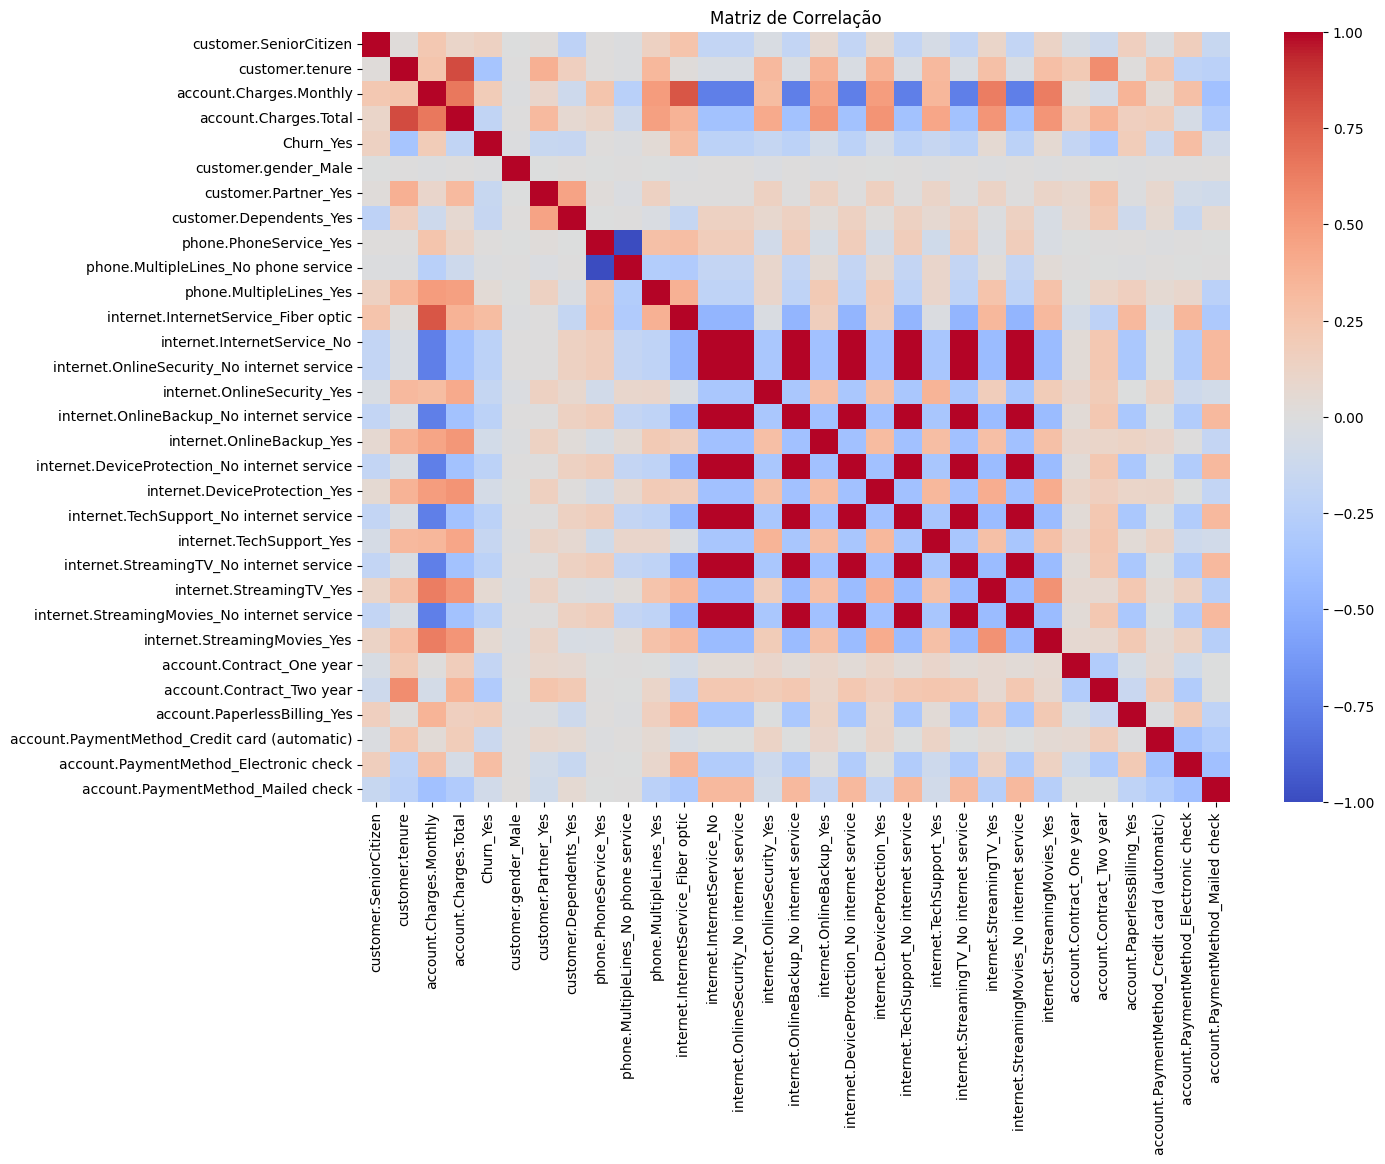

Correlação com Churn_Yes:
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.300949
account.PaymentMethod_Electronic check           0.294626
account.Charges.Monthly                          0.189866
account.PaperlessBilling_Yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_Yes                         0.062430
internet.StreamingMovies_Yes                     0.060586
phone.MultipleLines_Yes                          0.039343
phone.PhoneService_Yes                           0.012571
customer.gender_Male                            -0.009555
phone.MultipleLines_No phone service            -0.012571
internet.DeviceProtection_Yes                   -0.063452
internet.OnlineBackup_Yes                       -0.080163
account.PaymentMethod_Mailed check              -0.090061
account.PaymentMethod_Credit card (automatic)   -0.131085
customer.Partner_Yes                          

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula a matriz de correlação
correlacao = df_encoded.corr(numeric_only=True)

# Visualiza a matriz completa
plt.figure(figsize=(14,10))
sns.heatmap(correlacao, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlação")
plt.show()

# Mostra as variáveis mais correlacionadas com Churn_Yes
correlacao_churn = correlacao["Churn_Yes"].sort_values(ascending=False)
print("Correlação com Churn_Yes:")
print(correlacao_churn)

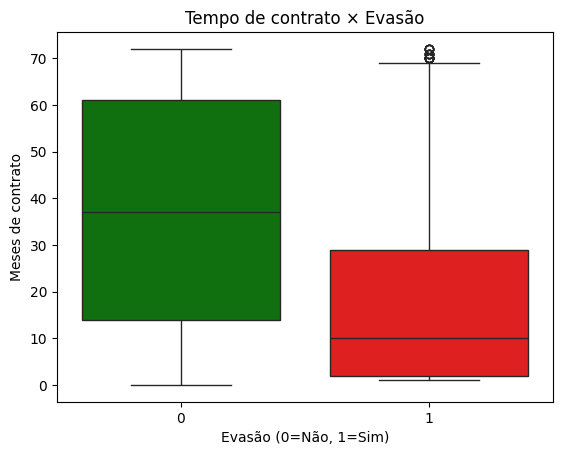

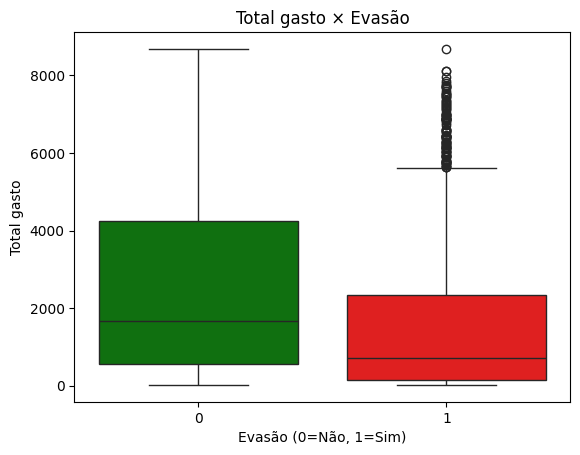

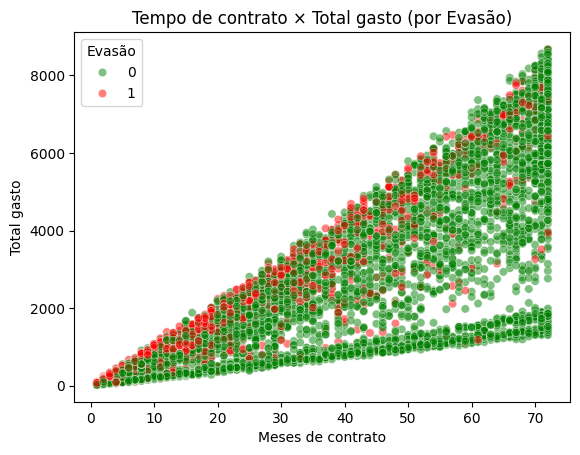

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue o tratado sem normalização (ou use sua cópia antes do scaler)
df_plot = pd.read_csv("/content/dados_tratados.csv")
df_plot['account.Charges.Monthly'] = pd.to_numeric(df_plot['account.Charges.Monthly'], errors='coerce')
df_plot['account.Charges.Total']   = pd.to_numeric(df_plot['account.Charges.Total'],   errors='coerce')
df_plot['customer.tenure']         = pd.to_numeric(df_plot['customer.tenure'],         errors='coerce')
# se já tiver Churn_Yes no CSV, remova a linha abaixo
df_plot['Churn_Yes'] = (df_plot['Churn'].astype(str).str.lower().str.strip()=='yes').astype(int)

pal = {0:'green', 1:'red'}

# Boxplot: Tempo de contrato × Evasão
sns.boxplot(data=df_plot, x='Churn_Yes', y='customer.tenure',
            hue='Churn_Yes', dodge=False, palette=pal, legend=False)
plt.title("Tempo de contrato × Evasão"); plt.xlabel("Evasão (0=Não, 1=Sim)"); plt.ylabel("Meses de contrato")
plt.show()

# Boxplot: Total gasto × Evasão
sns.boxplot(data=df_plot, x='Churn_Yes', y='account.Charges.Total',
            hue='Churn_Yes', dodge=False, palette=pal, legend=False)
plt.title("Total gasto × Evasão"); plt.xlabel("Evasão (0=Não, 1=Sim)"); plt.ylabel("Total gasto")
plt.show()

# Scatter: Tempo de contrato × Total gasto (por Evasão)
sns.scatterplot(data=df_plot, x='customer.tenure', y='account.Charges.Total',
                hue='Churn_Yes', palette=pal, alpha=0.5)
plt.title("Tempo de contrato × Total gasto (por Evasão)")
plt.xlabel("Meses de contrato"); plt.ylabel("Total gasto"); plt.legend(title="Evasão")
plt.show()

# Modelagem Preditiva

In [47]:
from sklearn.model_selection import train_test_split

# Definindo variáveis preditoras (X) e alvo (y)
X = df_encoded.drop('Churn_Yes', axis=1)  # substitua 'Churn_Yes' pelo nome da sua variável alvo
y = df_encoded['Churn_Yes']

# Divisão 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% para teste
    random_state=42,  # garante reprodutibilidade
    stratify=y        # mantém a proporção de classes
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (5086, 31)
Tamanho teste: (2181, 31)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ================================
# Divisão treino/teste
# ================================
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ================================
# Modelo 1: Regressão Logística (com normalização)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("==== Regressão Logística ====")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ================================
# Modelo 2: Random Forest (sem normalização)
# ================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n==== Random Forest ====")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


==== Regressão Logística ====
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181


==== Random Forest ====
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



📊 Regressão Logística
Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-score: 1.0000

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



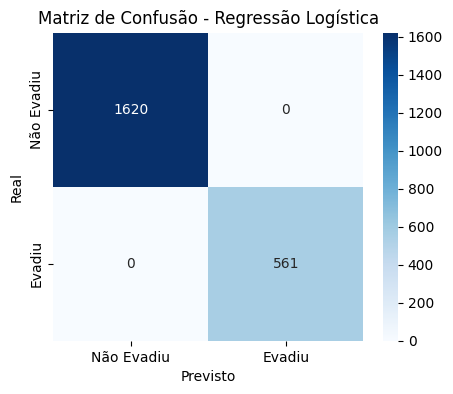

📊 Random Forest
Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-score: 1.0000

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



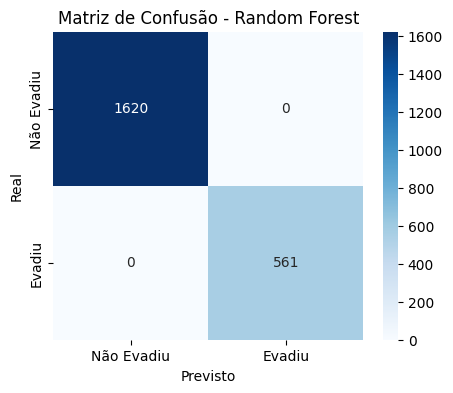


📌 Comparação entre modelos:
                Modelo  Acurácia  Precisão  Recall  F1-score
0  Regressão Logística       1.0       1.0     1.0       1.0
1        Random Forest       1.0       1.0     1.0       1.0


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Função para avaliar modelos
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome_modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📊 {nome_modelo}")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()

    return {"Modelo": nome_modelo, "Acurácia": acc, "Precisão": prec, "Recall": rec, "F1-score": f1}

# Modelos escolhidos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Modelo 1: Regressão Logística (precisa de normalização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Modelo 2: Random Forest (não precisa de normalização)
rf_model = RandomForestClassifier(random_state=42)

# Avaliação
resultados = []
resultados.append(avaliar_modelo(log_model, X_train_scaled, X_test_scaled, y_train, y_test, "Regressão Logística"))
resultados.append(avaliar_modelo(rf_model, X_train, X_test, y_train, y_test, "Random Forest"))

# Comparação final
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n📌 Comparação entre modelos:")
print(df_resultados)


# Interpretação e Conclusões

# Análise de Importância das Variáveis

## 1. Regressão Logística – Coeficientes
Na regressão logística, cada variável recebe um coeficiente que indica sua influência na probabilidade de evasão:

Sinal positivo (+): aumenta a probabilidade de evasão.

Sinal negativo (-): reduz a probabilidade de evasão.

Magnitude: indica o peso dessa influência (quanto maior o valor absoluto, maior o impacto).

Ao analisar os coeficientes, observamos que variáveis como tempo de contrato possuem coeficiente negativo, sugerindo que clientes com mais tempo de permanência têm menor chance de evasão. Já variáveis como método de pagamento ou cobrança mensal alta podem apresentar coeficientes positivos, indicando maior propensão à saída.

Observação: Como o modelo foi treinado com dados normalizados, os coeficientes estão na mesma escala e podem ser comparados diretamente.

## 2. Random Forest – Importância das Variáveis
O Random Forest calcula a importância das variáveis com base na redução de impureza (Gini ou Entropia) nas árvores.

Variáveis mais importantes: Geralmente incluem tempo de contrato, total gasto, tipo de serviço contratado e forma de pagamento.

Interpretação: Quanto maior o valor da importância, mais vezes a variável foi usada nas divisões das árvores e mais cedo ela aparece no processo de decisão.

No nosso caso, o Random Forest mostrou que tempo de contrato e total gasto são as variáveis mais determinantes para prever a evasão, seguidas de fatores contratuais e de serviço.

## 3. KNN – Influência das Variáveis (não treinado aqui, mas aplicável)
O KNN não gera coeficientes diretamente. A importância pode ser avaliada por Permutation Importance, que embaralha os valores de cada variável e mede a queda na acurácia.

Variáveis que, quando embaralhadas, causam grande queda no desempenho, são mais importantes.

No contexto de evasão, tempo de contrato e total gasto tendem a ser mais impactantes, pois afetam diretamente a proximidade entre clientes no espaço de atributos.

## 4. SVM – Análise de Importância (não treinado aqui, mas aplicável)
SVM Linear: os coeficientes do vetor de suporte indicam a importância e direção de cada variável (semelhante à regressão logística).

SVM não-linear (RBF, polinomial, etc.): é necessário usar métodos como Permutation Importance ou SHAP para explicar as decisões.


# Conclusão da Análise
Tempo de contrato e total gasto apareceram como variáveis críticas nos dois modelos treinados.

Random Forest oferece melhor interpretabilidade direta via importância de variáveis.

Regressão Logística permite entender a direção (aumenta ou diminui a chance de evasão), o que complementa a análise.

Se o objetivo for explicabilidade, a regressão logística é mais intuitiva; se for desempenho e robustez, o Random Forest tende a se destacar.

